<a href="https://colab.research.google.com/github/saraibare/6.-Regresion-Lineal/blob/main/Act_6_1_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from turtle import color
from google.colab import files
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#Cargar archivo csv desde equipo
#d = files.upload()

In [3]:
eua = pd.read_csv("eua.csv")
españa = pd.read_csv("españa.csv")
mexico = pd.read_csv("mexico.csv")

<ipython-input-3-add764aa2248>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  españa = pd.read_csv("españa.csv")


# **México**

In [4]:
mexico['host_acceptance_rate'] = mexico['host_acceptance_rate'].replace({'Sin datos': '0'})
mexico['host_acceptance_rate'] = mexico['host_acceptance_rate'].replace({'1 bath': '0'})
mexico['host_acceptance_rate'] = mexico['host_acceptance_rate'].str.rstrip('%').astype('float')

mexico['host_response_rate'] = mexico['host_response_rate'].replace({'Sin datos': '0'})
mexico['host_response_rate'] = mexico['host_response_rate'].replace({'Entire home/apt': '0'})
mexico['host_response_rate'] = mexico['host_response_rate'].str.rstrip('%').astype('float')

In [5]:
mexico['price'] = mexico['price'].replace({'Sin datos': '0'})
mexico['price'] = mexico['price'].str.replace(',','')
mexico['price'] = mexico['price'].str.lstrip('$').astype('float')


## **Análisis de correlación**

### **Hotel Room**

In [6]:
mexicoa = mexico[mexico['room_type']=='Hotel room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

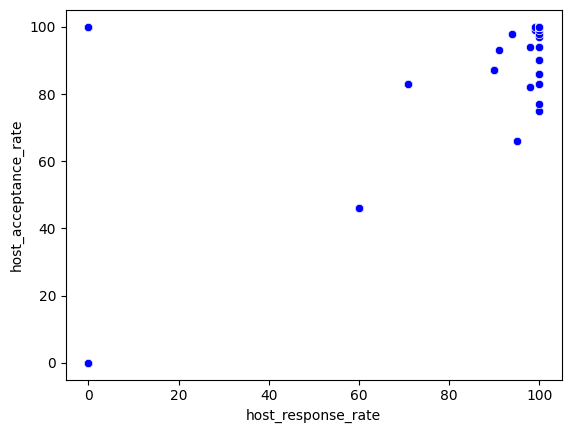

In [7]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexicoa)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

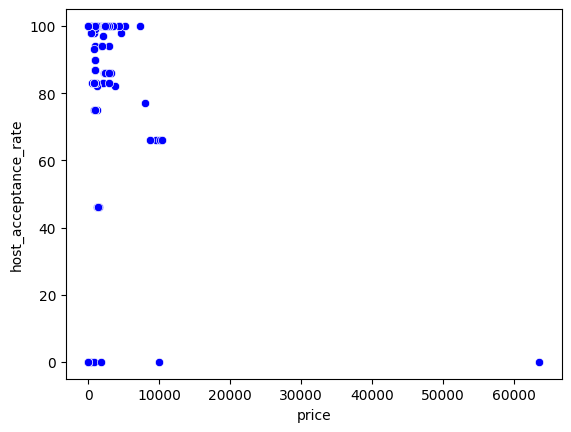

In [8]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=mexicoa)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

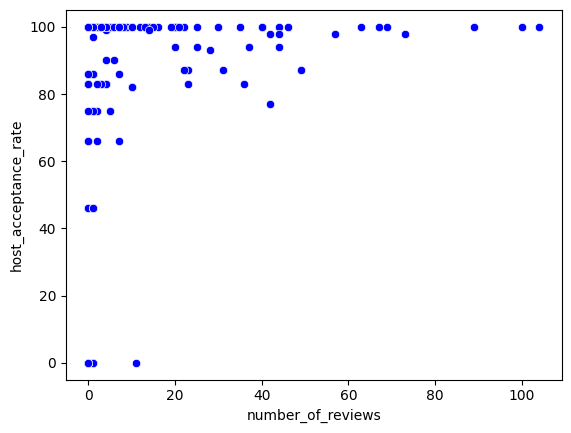

In [9]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=mexicoa)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

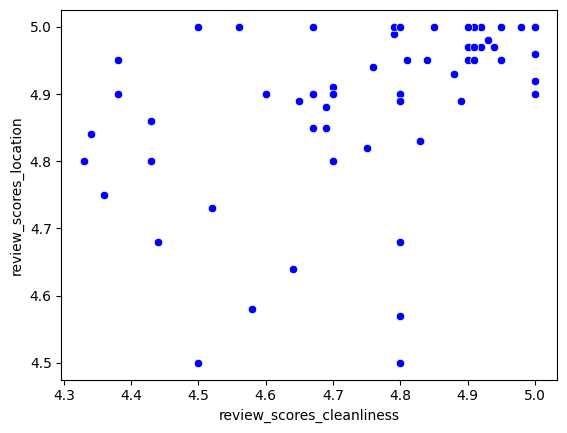

In [10]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=mexicoa)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

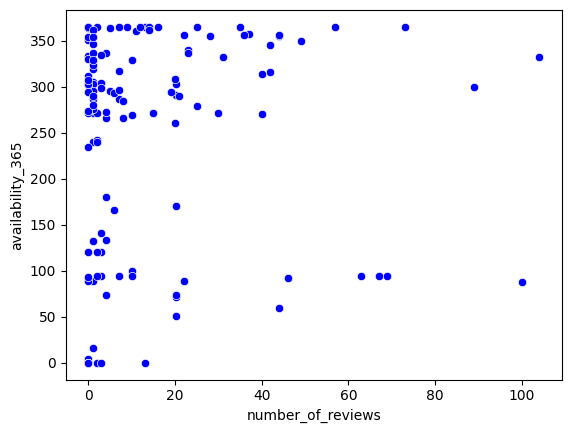

In [11]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=mexicoa)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

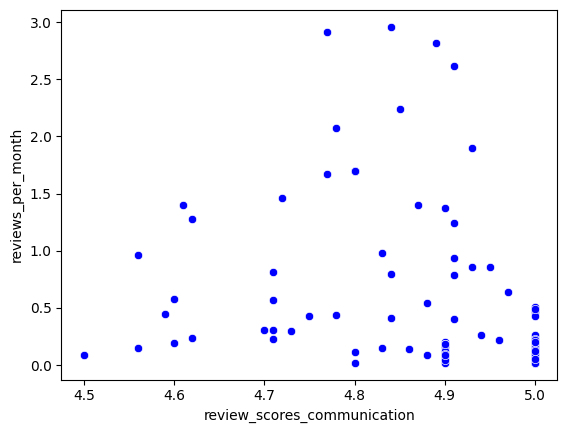

In [12]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=mexicoa)

### **Entire home/apt**

In [13]:
mexicob = mexico[mexico['room_type']=='Entire home/apt']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

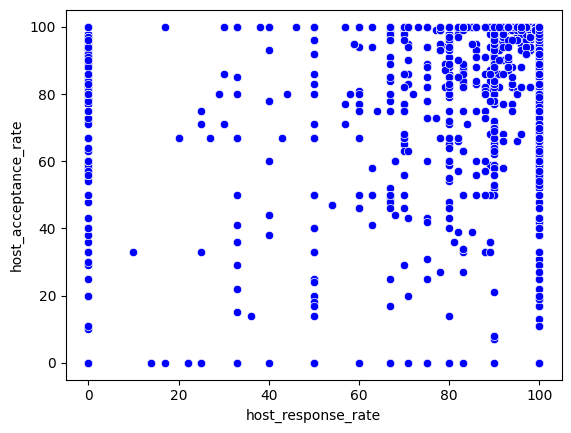

In [14]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexicob)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

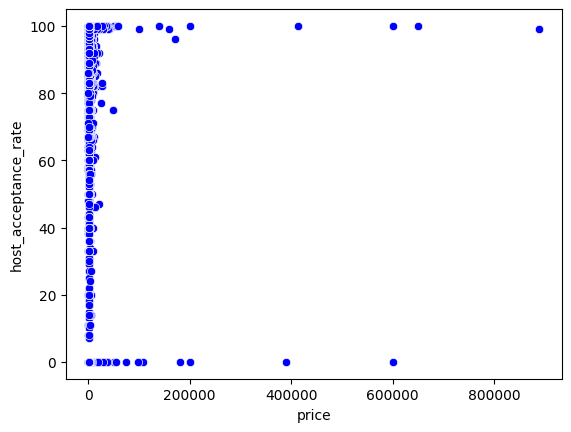

In [15]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=mexicob)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

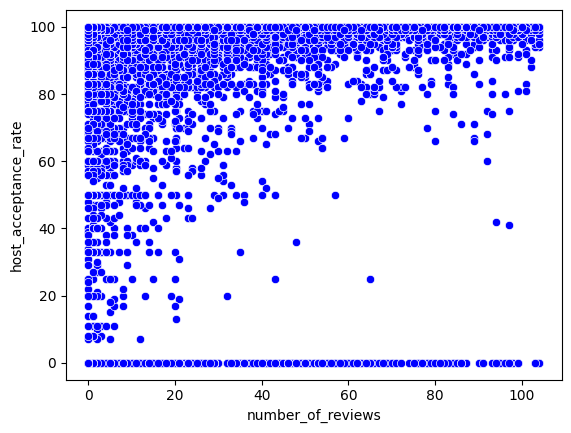

In [16]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=mexicob)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

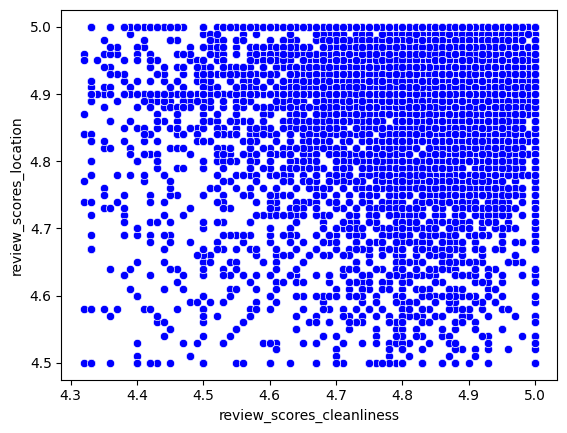

In [17]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=mexicob)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

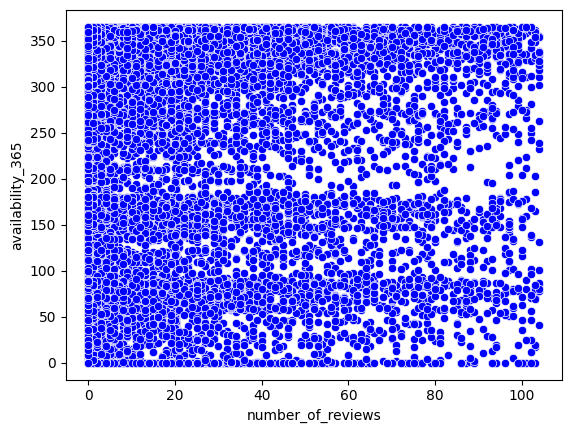

In [18]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=mexicob)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

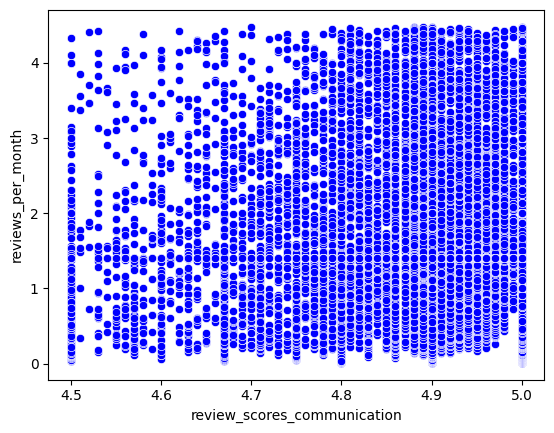

In [19]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=mexicob)

## **Modelo matemático**

### **Hotel Room**

In [20]:
mexicoa_num = mexicoa.select_dtypes(include='number')
#sns.pairplot(mexicoa_num)

In [21]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors=mexicoa_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews                               1.000000
number_of_reviews_ltm                           0.604661
calculated_host_listings_count_private_rooms    0.347362
number_of_reviews_l30d                          0.342953
maximum_nights                                  0.301442
Name: number_of_reviews, dtype: float64

In [22]:
varcorr = Corr_Factors.index[1]
print(varcorr)

number_of_reviews_ltm


In [23]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= mexicoa[[varcorr]]
Var_Dep= mexicoa['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.01853018]),
 'rank_': 1,
 'singular_': array([71.44795474]),
 'intercept_': 8.242059851222614}

In [24]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.36561492161843034

In [25]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=mexicoa_num[[varcorr]])

In [26]:
#Insertamos la columna de predicciones en el DataFrame
mexicoa_num.insert(0, 'Predicciones', y_pred)
mexicoa_num.head()

,Predicciones,Unnamed: 0,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,8.242060,14.0,90.0,87.0,1006.0,737328.0,2.023033e+13,3850198.0,19.0,21.0,...,4.83,5.0,5.0,4.83,4.78,11.0,7.0,0.0,0.0,0.18
53,8.242060,53.0,90.0,87.0,1006.0,865012.0,2.023033e+13,3850198.0,19.0,21.0,...,4.94,5.0,5.0,4.97,4.97,11.0,7.0,0.0,0.0,0.25
55,26.408832,55.0,90.0,87.0,908.0,868843.0,2.023033e+13,3850198.0,19.0,21.0,...,4.92,5.0,5.0,5.00,4.90,11.0,7.0,0.0,0.0,0.46
62,14.297650,62.0,90.0,87.0,908.0,869063.0,2.023033e+13,3850198.0,19.0,21.0,...,4.95,5.0,5.0,4.95,4.95,11.0,7.0,0.0,0.0,0.25
66,8.242060,66.0,100.0,86.0,3162.0,281134.0,2.023033e+13,196253.0,16.0,16.0,...,5.00,5.0,5.0,5.00,4.86,12.0,3.0,2.0,0.0,0.07


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

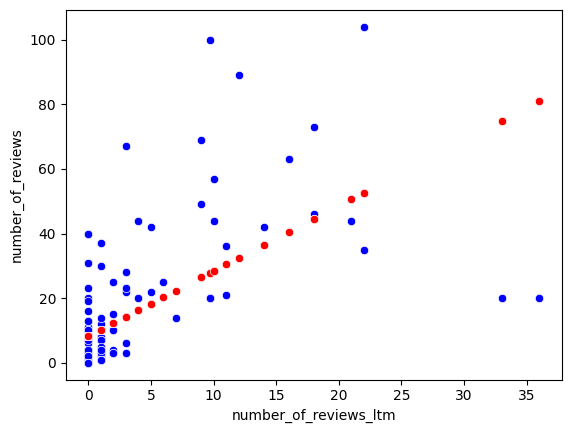

In [27]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=mexicoa_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=mexicoa_num)

In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_mexicoa=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_mexicoa)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_mexicoa=np.sqrt(Deter_mexicoa)
print('Coeficiente de correlación: %.2f' % Correl_mexicoa)

R2: 0.37
Coeficiente de correlación: 0.60


### **Entire home/apt**

In [29]:
mexicob_num = mexicob.select_dtypes(include='number')

In [30]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors = mexicob_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews         1.000000
number_of_reviews_ltm     0.523533
number_of_reviews_l30d    0.281102
reviews_per_month         0.246284
maximum_maximum_nights    0.213955
Name: number_of_reviews, dtype: float64

In [31]:
varcorr = Corr_Factors.index[1]
print(varcorr)

number_of_reviews_ltm


In [32]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= mexicob[[varcorr]]
Var_Dep= mexicob['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.04014436]),
 'rank_': 1,
 'singular_': array([1531.74850924]),
 'intercept_': 11.033303701758074}

In [33]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.27408645873112647

In [34]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=mexicob_num[[varcorr]])

In [35]:
#Insertamos la columna de predicciones en el DataFrame
mexicob_num.insert(0, 'Predicciones', y_pred)
mexicob_num.head()

,Predicciones,Unnamed: 0,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11.033304,0.0,100.0,0.0,1434.0,2056638.0,2.023033e+13,10531228.0,3.0,7.0,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,12.073448,1.0,0.0,0.0,830.0,2072354.0,2.023033e+13,16840050.0,3.0,3.0,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,13.113592,2.0,100.0,90.0,1469.0,696037.0,2.023033e+13,3531879.0,4.0,4.0,...,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
3,11.033304,3.0,0.0,0.0,3658.0,35797.0,2.023033e+13,153786.0,1.0,1.0,...,4.70,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,1.70
4,23.515036,4.0,100.0,86.0,18000.0,44616.0,2.023033e+13,196253.0,16.0,16.0,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

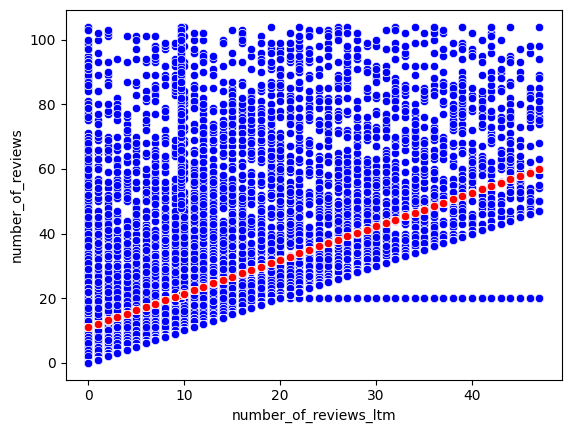

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=mexicob_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=mexicob_num)

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_mexicob=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_mexicob)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_mexicob=np.sqrt(Deter_mexicob)
print('Coeficiente de correlación: %.2f' % Correl_mexicob)

R2: 0.27
Coeficiente de correlación: 0.52


## **Coeficientes de determinación y correlación**

In [38]:
coefdet1 = {'Coeficientes': ['Determinación', 'Correlación'],
           'Hotel Room':[Deter_mexicoa, Correl_mexicoa],
           'Entire home/apt':[Deter_mexicob, Correl_mexicob]}
coefdet1 = pd.DataFrame(coefdet1)
coefdet1

,Coeficientes,Hotel Room,Entire home/apt
0,Determinación,0.365615,0.274086
1,Correlación,0.604661,0.523533


# **EUA**

In [39]:
eua['host_acceptance_rate'] = eua['host_acceptance_rate'].replace({'Sin datos': '0'})
#eua['host_acceptance_rate'] = eua['host_acceptance_rate'].replace({'1 bath': '0'})
eua['host_acceptance_rate'] = eua['host_acceptance_rate'].str.rstrip('%').astype('float')

eua['host_response_rate'] = eua['host_response_rate'].replace({'Sin datos': '0'})
#eua['host_response_rate'] = eua['host_response_rate'].replace({'Entire home/apt': '0'})
eua['host_response_rate'] = eua['host_response_rate'].str.rstrip('%').astype('float')

In [40]:
eua['price'] = eua['price'].replace({'Sin datos': '0'})
eua['price'] = eua['price'].str.replace(',','')
eua['price'] = eua['price'].str.lstrip('$').astype('float')


## **Análisis de correlación**

### **Hotel Room**

In [41]:
euaA = eua[eua['room_type']=='Hotel room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

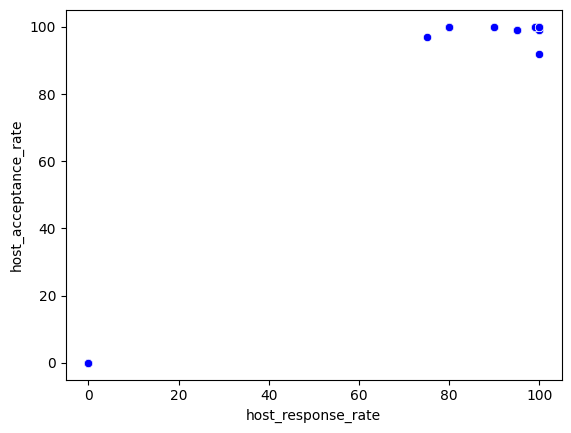

In [42]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=euaA)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

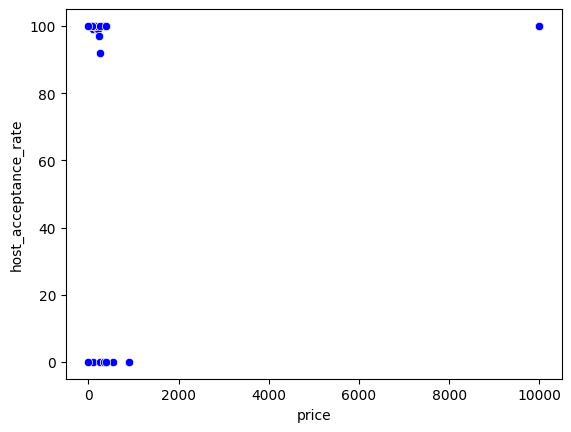

In [43]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=euaA)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

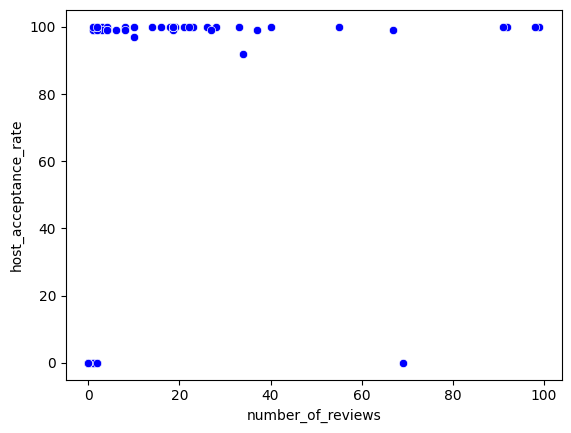

In [44]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=euaA)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

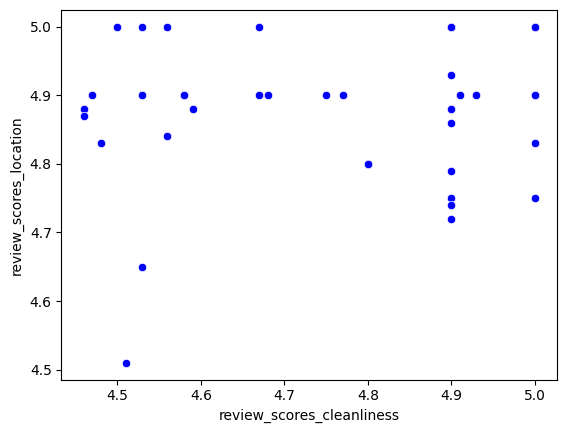

In [45]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=euaA)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

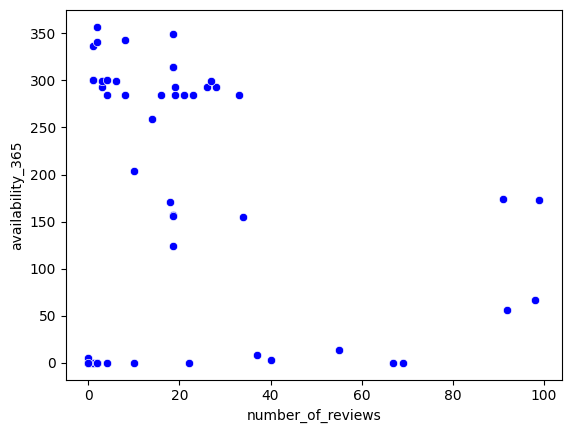

In [46]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=euaA)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

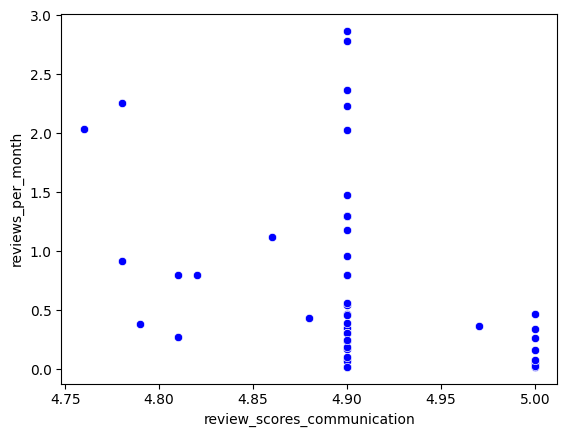

In [47]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=euaA)

### **Entire home/apt**

In [48]:
euaB = eua[eua['room_type']=='Entire home/apt']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

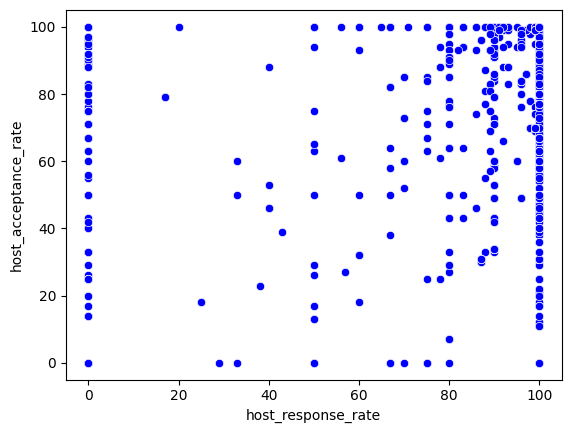

In [49]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=euaB)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

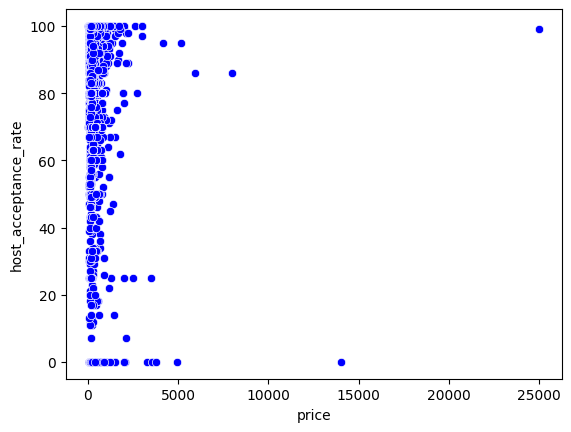

In [50]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=euaB)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

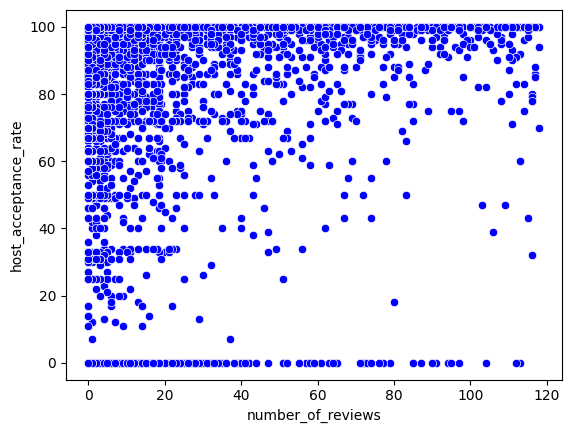

In [51]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=euaB)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

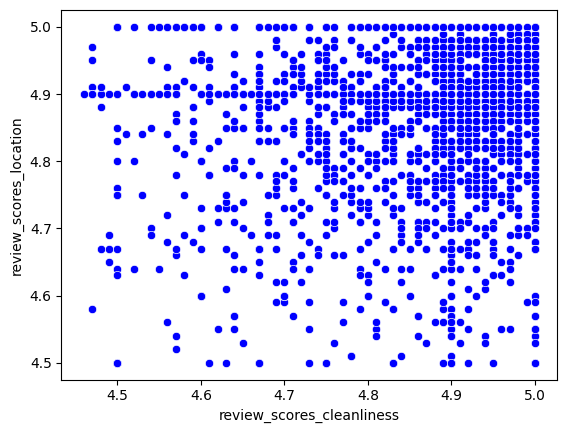

In [52]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=euaB)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

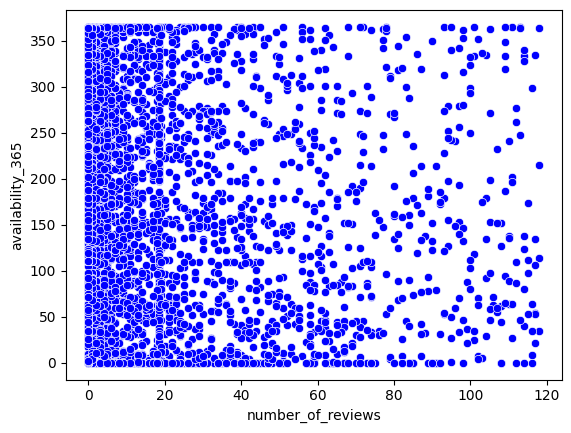

In [53]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=euaB)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

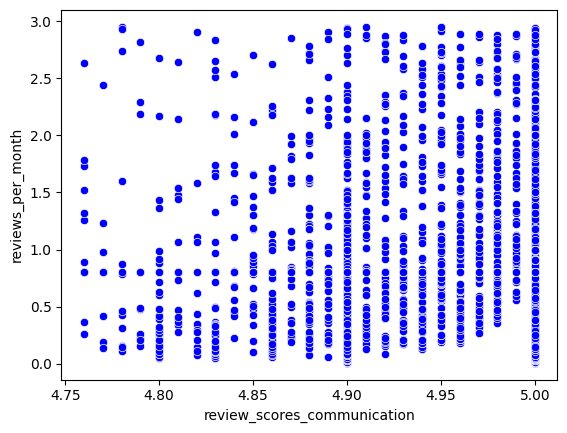

In [54]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=euaB)

## **Modelo matemático**

### **Hotel Room**

In [55]:
euaA_num = euaA.select_dtypes(include='number')

In [56]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors=euaA_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews                 1.000000
reviews_per_month                 0.614275
calculated_host_listings_count    0.446768
host_listings_count               0.362121
number_of_reviews_l30d            0.312202
Name: number_of_reviews, dtype: float64

In [57]:
varcorr = Corr_Factors.index[1]
print(varcorr)

reviews_per_month


In [58]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= euaA_num[[varcorr]]
Var_Dep= euaA_num['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.25910705]),
 'rank_': 1,
 'singular_': array([5.52475182]),
 'intercept_': 6.194513492052838}

In [59]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.3773343161713647

In [60]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=euaA_num[[varcorr]])

In [61]:
#Insertamos la columna de predicciones en el DataFrame
euaA_num.insert(0, 'Predicciones', y_pred)
euaA_num.head()

,Predicciones,Unnamed: 0,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
711,23.201799,711,99.0,100.0,98.0,4631873.0,2.020000e+13,20850212.0,16.0,17.0,...,4.59,4.89,4.82,4.88,4.63,16.0,0.0,0.7,0.0,0.80
787,65.294831,787,99.0,100.0,129.0,6169292.0,2.020000e+13,20850212.0,16.0,17.0,...,4.56,4.84,4.90,4.84,4.39,16.0,0.0,0.7,0.0,2.78
938,14.060383,938,100.0,92.0,250.0,6883183.0,2.020000e+13,23593310.0,5.0,10.0,...,5.00,4.94,4.97,5.00,4.91,1.0,0.0,0.0,0.0,0.37
1704,11.296699,1704,99.0,100.0,91.0,16001051.0,2.020000e+13,103884979.0,14.0,15.0,...,4.53,4.90,4.90,4.90,4.80,14.0,0.0,0.7,0.0,0.24
2229,9.808562,2229,80.0,100.0,119.0,23271377.0,2.020000e+13,173206762.0,5.3,7.7,...,4.90,4.90,4.90,4.75,4.80,3.5,0.0,0.7,0.0,0.17


<Axes: xlabel='reviews_per_month', ylabel='number_of_reviews'>

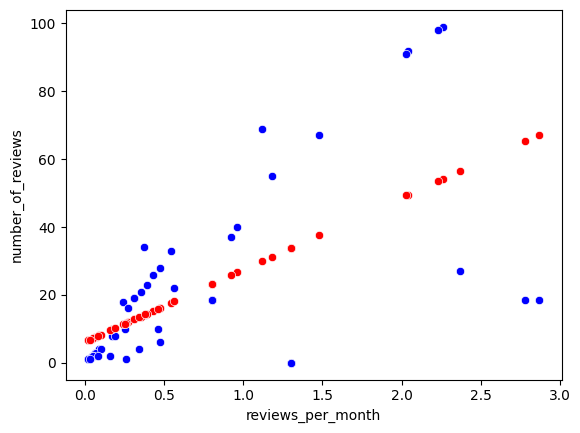

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=euaA_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=euaA_num)

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_euaA=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_euaA)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_euaA=np.sqrt(Deter_euaA)
print('Coeficiente de correlación: %.2f' % Correl_euaA)

R2: 0.38
Coeficiente de correlación: 0.61


### **Entire home/apt**

In [64]:
euaB_num = euaB.select_dtypes(include='number')

In [65]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors = euaB_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews         1.000000
number_of_reviews_ltm     0.370390
reviews_per_month         0.188674
number_of_reviews_l30d    0.188105
host_acceptance_rate      0.137860
Name: number_of_reviews, dtype: float64

In [66]:
varcorr = Corr_Factors.index[1]
print(varcorr)

number_of_reviews_ltm


In [67]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= euaB_num[[varcorr]]
Var_Dep= euaB_num['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.74133292]),
 'rank_': 1,
 'singular_': array([353.17332283]),
 'intercept_': 11.332962842675371}

In [68]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.13718894218763822

In [69]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=euaB_num[[varcorr]])

In [70]:
#Insertamos la columna de predicciones en el DataFrame
euaB_num.insert(0, 'Predicciones', y_pred)
euaB_num.head()

,Predicciones,Unnamed: 0,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17.601761,0,100.0,100.0,202.0,958.0,2.020000e+13,1169.0,1.0,1.0,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,11.332963,1,80.0,71.0,235.0,5858.0,2.020000e+13,8904.0,2.0,2.0,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,11.332963,3,100.0,0.0,575.0,8339.0,2.020000e+13,24215.0,2.0,6.0,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,33.970291,5,100.0,95.0,259.0,142177.0,2.020000e+13,656263.0,1.0,2.0,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,35.711624,8,100.0,61.0,425.0,491867.0,2.020000e+13,969518.0,2.0,3.0,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

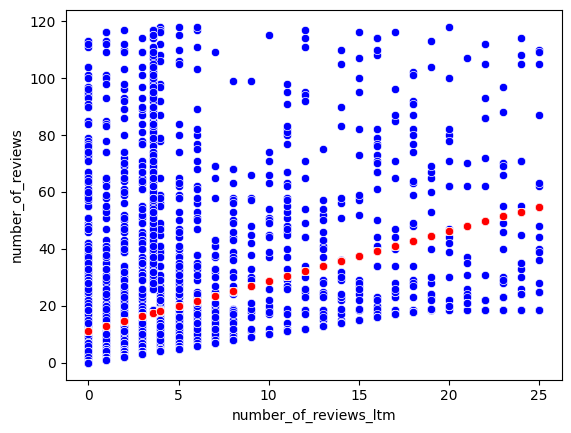

In [71]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=euaB_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=euaB_num)

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_euaB=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_euaB)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_euaB=np.sqrt(Deter_euaB)
print('Coeficiente de correlación: %.2f' % Correl_euaB)

R2: 0.14
Coeficiente de correlación: 0.37


## **Coeficientes de determinación y correlación**

In [73]:
coefdet2 = {'Coeficientes': ['Determinación', 'Correlación'],
           'Hotel Room':[Deter_euaA, Correl_euaA],
           'Entire home/apt':[Deter_euaB, Correl_euaB]}
coefdet2 = pd.DataFrame(coefdet2)
coefdet2

,Coeficientes,Hotel Room,Entire home/apt
0,Determinación,0.377334,0.137189
1,Correlación,0.614275,0.370390


# **España**

In [74]:
españa['host_acceptance_rate'] = españa['host_acceptance_rate'].replace({'Sin datos': '0'})
españa['host_acceptance_rate'] = españa['host_acceptance_rate'].replace({'4 baths': '0'})
españa['host_acceptance_rate'] = españa['host_acceptance_rate'].str.rstrip('%').astype('float')

españa['host_response_rate'] = españa['host_response_rate'].replace({'Sin datos': '0'})
españa['host_response_rate'] = españa['host_response_rate'].replace({'Entire home/apt': '0'})
españa['host_response_rate'] = españa['host_response_rate'].str.rstrip('%').astype('float')

In [75]:
españa['price'] = españa['price'].replace({'Sin datos': '0'})
españa['price'] = españa['price'].str.replace(',','')
españa['price'] = españa['price'].str.lstrip('$').astype('float')


## **Análisis de correlación**

### **Hotel Room**

In [76]:
españaA = españa[españa['room_type']=='Hotel room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

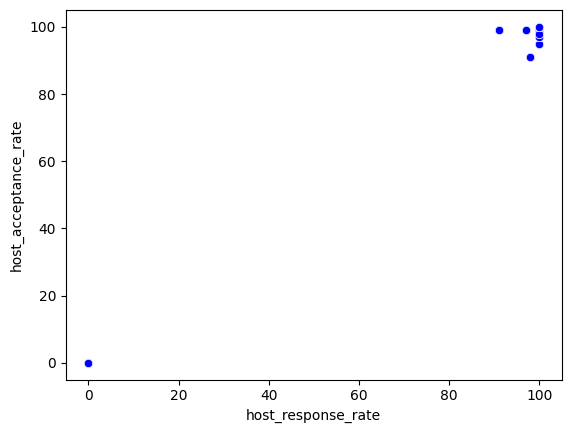

In [77]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=españaA)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

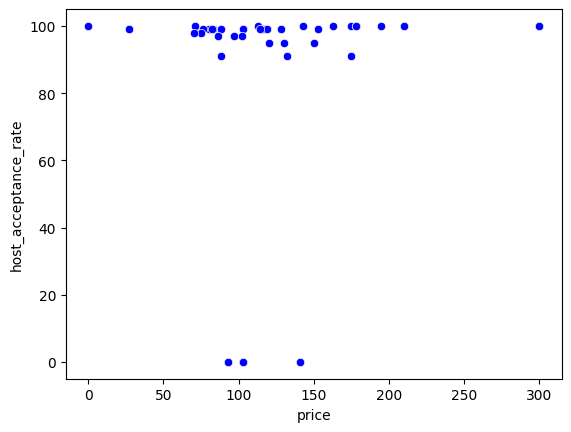

In [78]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=españaA)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

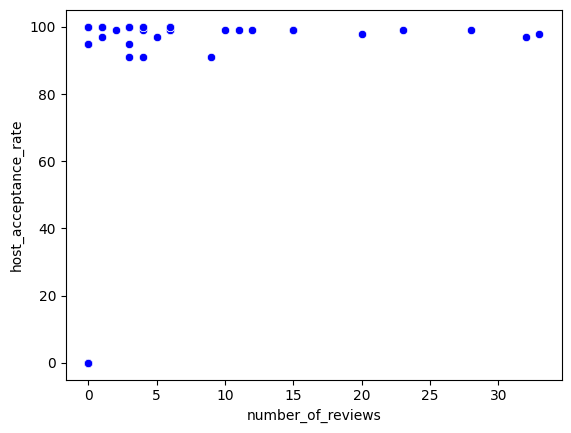

In [79]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=españaA)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

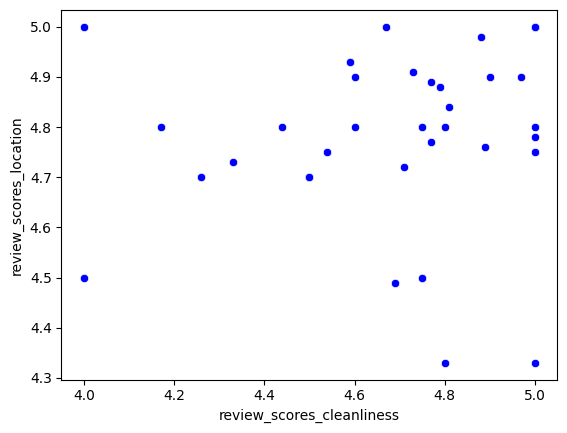

In [80]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=españaA)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

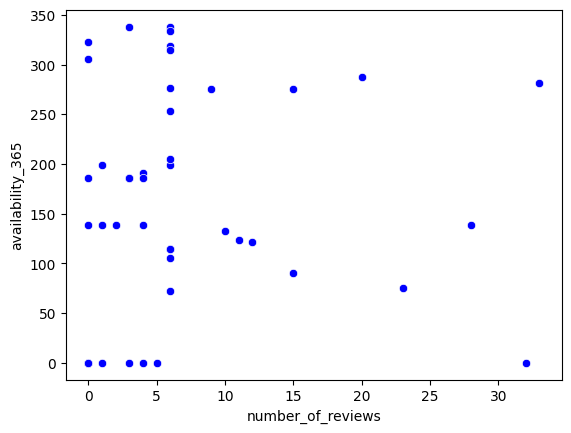

In [81]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=españaA)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

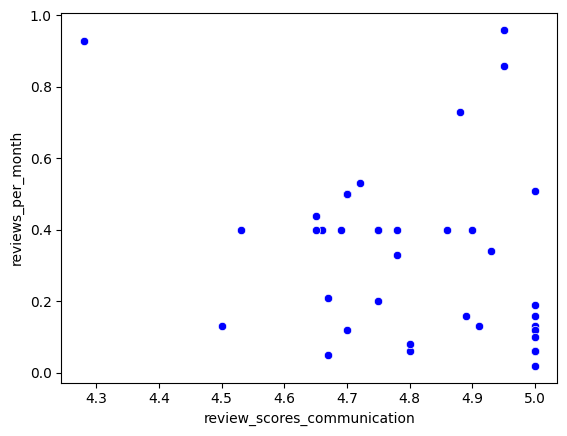

In [82]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=españaA)

### **Entire home/apt**

In [83]:
españaB = españa[españa['room_type']=='Entire home/apt']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

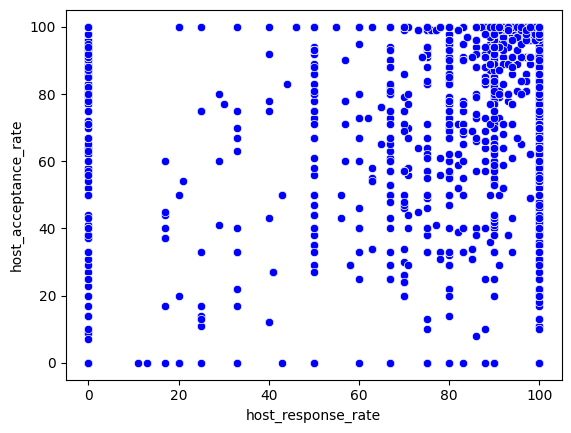

In [84]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=españaB)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

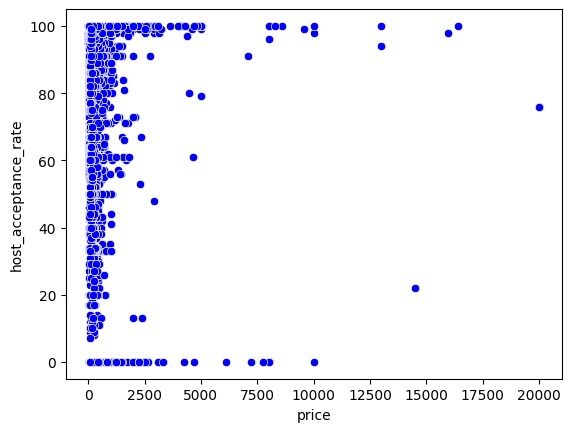

In [85]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=españaB)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

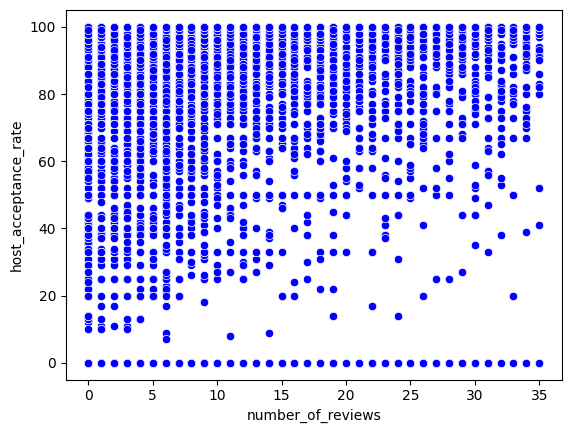

In [86]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=españaB)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

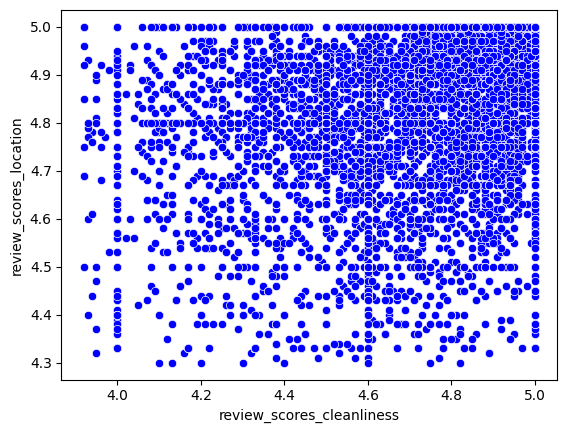

In [87]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=españaB)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

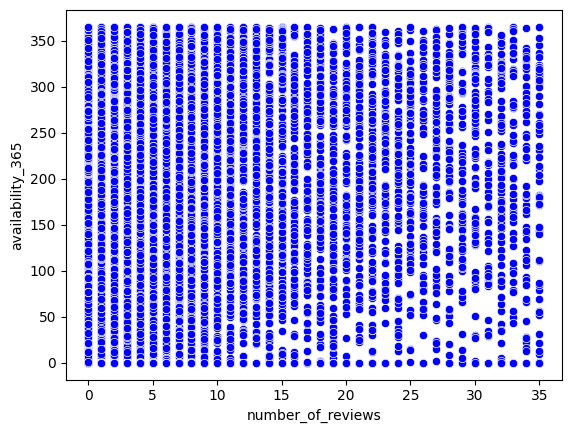

In [88]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=españaB)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

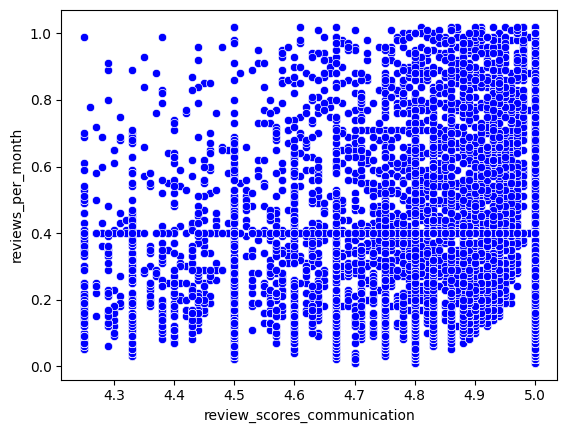

In [89]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=españaB)

## **Modelo matemático**

### **Hotel Room**

In [90]:
españaA_num = españaA.select_dtypes(include='number')

In [91]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors=españaA_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews         1.000000
number_of_reviews_ltm     0.699633
minimum_minimum_nights    0.426970
host_acceptance_rate      0.394212
host_response_rate        0.370940
Name: number_of_reviews, dtype: float64

In [92]:
varcorr = Corr_Factors.index[1]
print(varcorr)

number_of_reviews_ltm


In [93]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= españaA_num[[varcorr]]
Var_Dep= españaA_num['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.5062283]),
 'rank_': 1,
 'singular_': array([15.94751391]),
 'intercept_': 1.7084402838592796}

In [94]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.4894867706095902

In [95]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=españaA_num[[varcorr]])

In [96]:
#Insertamos la columna de predicciones en el DataFrame
españaA_num.insert(0, 'Predicciones', y_pred)
españaA_num.head()

,Predicciones,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1223,6.720897,91.0,99.0,103.0,7027939.0,2.023030e+13,4629712.0,112.0,173.0,41.88185,...,4.17,4.80,4.50,4.80,4.00,110.0,102.0,0.0,0.0,0.13
1391,26.770723,100.0,100.0,300.0,8787562.0,2.023030e+13,46056847.0,1.0,1.0,41.96818,...,4.59,4.77,4.86,4.93,4.63,1.0,0.0,0.0,0.0,0.40
1617,4.214669,91.0,99.0,88.0,11372300.0,2.023030e+13,4629712.0,112.0,173.0,41.96867,...,4.50,4.50,4.70,4.70,4.30,110.0,102.0,0.0,0.0,0.12
1830,16.745810,91.0,99.0,80.0,12614906.0,2.023030e+13,4629712.0,112.0,173.0,41.95224,...,4.54,4.64,4.93,4.75,4.61,110.0,102.0,0.0,0.0,0.34
2062,6.720897,91.0,99.0,76.0,13049755.0,2.023030e+13,4629712.0,112.0,173.0,41.95200,...,4.73,4.91,4.91,4.91,4.45,110.0,102.0,0.0,0.0,0.13


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

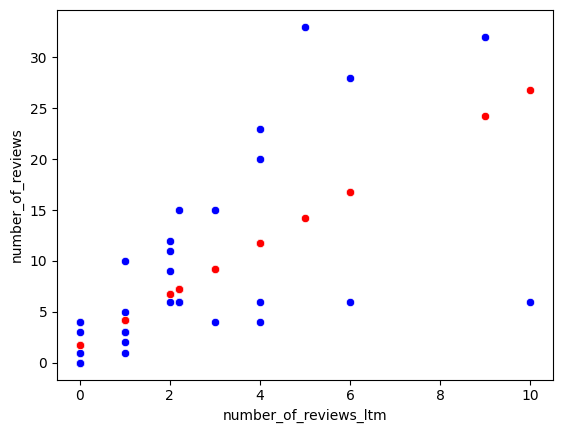

In [97]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=españaA_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=españaA_num)

In [98]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_españaA=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_españaA)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_españaA=np.sqrt(Deter_españaA)
print('Coeficiente de correlación: %.2f' % Correl_españaA)

R2: 0.49
Coeficiente de correlación: 0.70


### **Entire home/apt**

In [99]:
españaB_num = españaB.select_dtypes(include='number')

In [100]:
#Encontramos todas las correlaciones entre las variables, efocándonos en la Y
Corr_Factors = españaB_num.corr()
Corr_Factors = Corr_Factors.sort_values(by='number_of_reviews', ascending = False)
Corr_Factors['number_of_reviews'].head()

number_of_reviews            1.000000
number_of_reviews_ltm        0.534444
review_scores_value          0.166079
minimum_maximum_nights       0.152707
review_scores_cleanliness    0.148288
Name: number_of_reviews, dtype: float64

In [101]:
varcorr = Corr_Factors.index[1]
print(varcorr)

number_of_reviews_ltm


In [102]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= españaB_num[[varcorr]]
Var_Dep= españaB_num['number_of_reviews']
#Se define model como la función de regresión lineal
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.42808905]),
 'rank_': 1,
 'singular_': array([383.42236123]),
 'intercept_': 2.8190787851121755}

In [103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2856298719860263

In [104]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=españaB_num[[varcorr]])

In [105]:
#Insertamos la columna de predicciones en el DataFrame
españaB_num.insert(0, 'Predicciones', y_pred)
españaB_num.head()

,Predicciones,host_response_rate,host_acceptance_rate,price,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,8.531435,100.0,80.0,74.0,1212820.0,2.023030e+13,6620645.0,2.0,3.0,42.11284,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,2.819079,0.0,0.0,120.0,41342.0,2.023030e+13,180072.0,2.0,3.0,42.34655,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,15.671880,100.0,100.0,105.0,751997.0,2.023030e+13,3387407.0,12.0,12.0,41.91798,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,2.819079,100.0,100.0,110.0,752035.0,2.023030e+13,3387407.0,12.0,12.0,41.91801,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,2.819079,0.0,0.0,60.0,1215790.0,2.023030e+13,3149645.0,1.0,1.0,41.84984,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

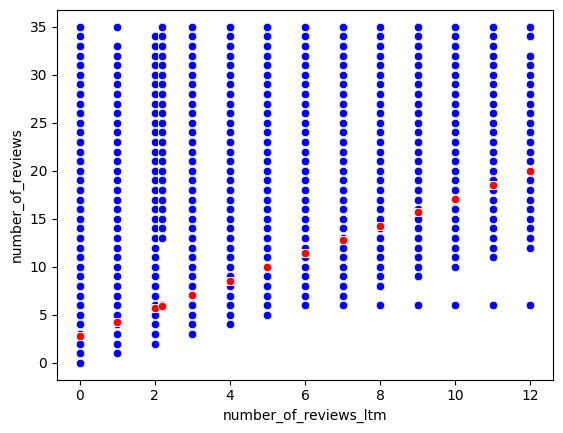

In [106]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=varcorr, y='number_of_reviews', color="blue", data=españaB_num)
sns.scatterplot(x=varcorr, y='Predicciones', color="red", data=españaB_num)

In [107]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
Deter_españaB=model.score(X=Vars_Indep, y=Var_Dep)
print('R2: %.2f' % Deter_españaB)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
Correl_españaB=np.sqrt(Deter_españaB)
print('Coeficiente de correlación: %.2f' % Correl_españaB)

R2: 0.29
Coeficiente de correlación: 0.53


## **Coeficientes de determinación y correlación**

In [108]:
coefdet3 = {'Coeficientes': ['Determinación', 'Correlación'],
           'Hotel Room':[Deter_españaA, Correl_españaA],
           'Entire home/apt':[Deter_españaB, Correl_españaB]}
coefdet3 = pd.DataFrame(coefdet3)
coefdet3

,Coeficientes,Hotel Room,Entire home/apt
0,Determinación,0.489487,0.285630
1,Correlación,0.699633,0.534444


# **Comparativo sobre el comportamiento de las ciudades elegidas**

In [111]:
coefdet1 = coefdet1.set_index('Coeficientes')
coefdet2 = coefdet2.set_index('Coeficientes')
coefdet3 = coefdet3.set_index('Coeficientes')

In [115]:
coefdet = pd.merge(coefdet1, coefdet2, on= 'Coeficientes', how = 'outer')
coefdet = pd.merge(coefdet, coefdet3, on= 'Coeficientes')
coefdet

,Hotel Room_x,Entire home/apt_x,Hotel Room_y,Entire home/apt_y,Hotel Room,Entire home/apt
Coeficientes,,,,,,
Determinación,0.365615,0.274086,0.377334,0.137189,0.489487,0.285630
Correlación,0.604661,0.523533,0.614275,0.370390,0.699633,0.534444
